In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
window_size = 100

In [99]:
time = np.arange(0,10,0.001)
part_1 = np.sin(2 * np.pi * time + np.pi / 4)
part_2 = np.cos(2 * np.pi * time / 2 - np.pi / 8)
part_3 = np.sin(np.exp(time / (2 * np.pi)))
part_4 = np.sin(2 * np.pi * time / 1.5 + np.pi / 3)
clean_signal = part_1 * 3 + part_2 * 1.5 + 3 * part_3 + part_4
noise = np.random.uniform(np.min(clean_signal) / 3, np.max(clean_signal) / 3, len(time)) 
noisy_signal = clean_signal + noise  


In [100]:
# make an extended array with shape len(signal) + window_size - 1, filled with ones
window = np.ones(window_size)
shapeshifted_signal = np.ones(len(clean_signal) + 2 * len(window) // 2 - 1)
shapeshifted_signal[len(window) // 2 : len(window) // 2 + len(clean_signal)] = noisy_signal
print(shapeshifted_signal)

[1. 1. 1. ... 1. 1. 1.]


In [101]:
X = np.empty([len(clean_signal), window_size])
for i in range(len(clean_signal)):
    X[i] = (shapeshifted_signal[i:i + len(window)])

print(X.shape)

(10000, 100)


In [102]:
coef = np.linalg.lstsq(X, clean_signal)
print(coef[0])

C:\Users\Артемка\AppData\Local\Temp\ipykernel_17080\2599245071.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef = np.linalg.lstsq(X, clean_signal)


[0.00564428 0.00566901 0.00585543 0.00579047 0.00583789 0.00577872
 0.00562483 0.00562677 0.00553476 0.00572515 0.00585474 0.00583211
 0.00594823 0.006135   0.00623945 0.00630598 0.00645934 0.00660013
 0.00669735 0.00681831 0.00683644 0.00705016 0.00735927 0.00747142
 0.00772525 0.00777429 0.00795851 0.00815067 0.00852344 0.00871055
 0.00893571 0.00925323 0.00935184 0.00953104 0.00982257 0.00999043
 0.0102357  0.01046923 0.01082684 0.01121383 0.01153124 0.01205139
 0.01244837 0.01266812 0.01308059 0.01363211 0.01401634 0.01462759
 0.01523976 0.01586274 0.01653463 0.01647056 0.01627203 0.0159028
 0.01569601 0.01501858 0.01488917 0.01488175 0.01479739 0.01476674
 0.01454808 0.0140797  0.0134446  0.01353018 0.01337541 0.01305148
 0.01288835 0.01271585 0.01264975 0.01225724 0.01228911 0.01203168
 0.01186014 0.011554   0.01101549 0.01088662 0.01083521 0.01073806
 0.01040242 0.0099885  0.01015553 0.00958086 0.00953811 0.00905214
 0.00877219 0.00855264 0.00836137 0.00785411 0.00736885 0.00711

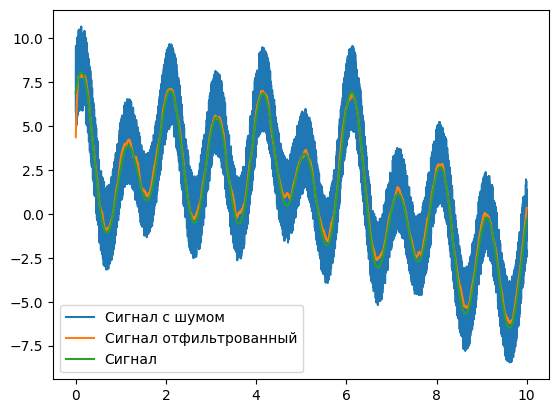

In [148]:
filtered_signal = X @ coef[0]
plt.plot(time, noisy_signal, label = 'Сигнал с шумом')
plt.plot(time, filtered_signal, label = 'Сигнал отфильтрованный')
plt.plot(time, clean_signal, label = 'Сигнал')
plt.legend()
plt.show()

(array([ 519.,  332.,  766., 1175., 1822., 1645., 1407.,  816.,  827.,
         691.]),
 array([-6.4921371 , -5.03725548, -3.58237386, -2.12749224, -0.67261062,
         0.782271  ,  2.23715262,  3.69203424,  5.14691586,  6.60179748,
         8.0566791 ]),
 <BarContainer object of 10 artists>)

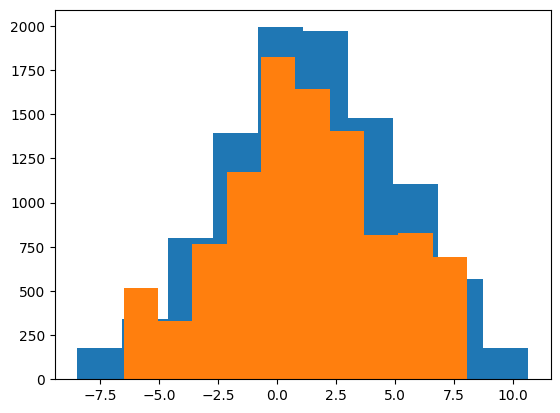

In [104]:
plt.hist(noisy_signal)
plt.hist(clean_signal)

In [186]:
def lms_adaptive_filter(input_signal, order=4, mu=0.01):
    """
    Адаптивная фильтрация на основе метода наименьших квадратов (LMS).
    
    Параметры:
    - input_signal: входной зашумленный сигнал
    - order: порядок фильтра (размер окна)
    - mu: коэффициент скорости обучения
    
    Возвращает:
    - clean_signal: отфильтрованный сигнал
    """
    N = len(input_signal)
    clean_signal = np.zeros(N)
    
    # Инициализация начальных параметров фильтра
    w = np.zeros(order)
    
    for i in range(order, N):
        x = input_signal[i - order : i]
        
        # Вычисление ошибки
        error = input_signal[i] - np.dot(w, x)
        #print(error)
        
        # Обновление весов фильтра по методу наименьших квадратов
        w = w + mu * error * x
        
        # Применение фильтра к текущему сэмплу
        #clean_signal[i] = np.dot(w, x)
    #print(w)
    clean_signal = np.convolve(input_signal, w, mode='same')
    return clean_signal

In [190]:
def calc_optimum(noisy_signal, clean_signal, mu_order):
    mu_range = [i/mu_order for i in range(100)]
    error_range = []
    for i in mu_range:
        filtered_signal = lms_adaptive_filter(noisy_signal, order=window_size, mu = i)
        error = np.max(np.abs(clean_signal - filtered_signal))
        error_range.append(error)

    mu_best = mu_range[np.argmin(error_range)]
    print(mu_best)
    return mu_best

3e-07


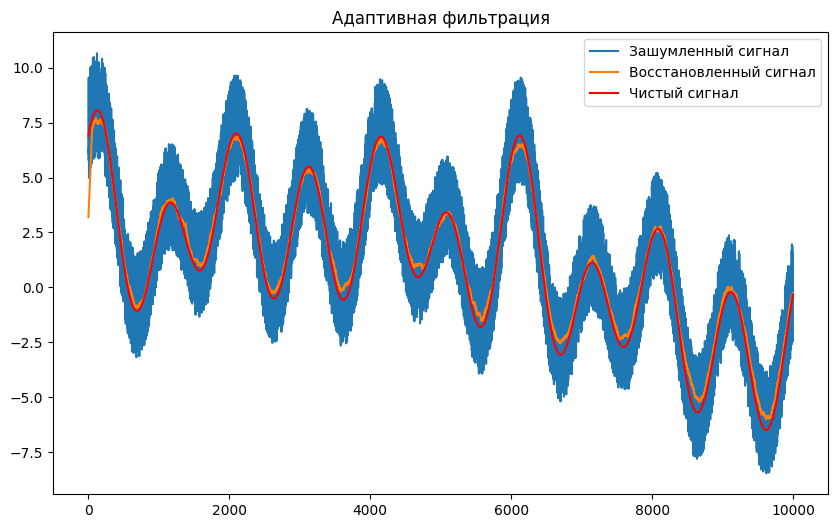

In [191]:
mu_best = calc_optimum(noisy_signal, clean_signal, 10000000)
filtered_signal = lms_adaptive_filter(noisy_signal, order=window_size, mu=mu_best )
plt.figure(figsize=(10, 6))
plt.plot(noisy_signal, label='Зашумленный сигнал')
plt.plot(filtered_signal, label='Восстановленный сигнал')
plt.plot(clean_signal, label='Чистый сигнал', c='r')
plt.legend()
plt.title('Адаптивная фильтрация')
plt.show()


In [166]:
data = pd.read_csv("_Все случаи по стране за день в динамике_2023-11-16_13-53-27.csv", sep=";", decimal=",")
data = data.iloc[:, [0 , 1]]
data["Дата"] = np.arange(len(data["Дата"]))

1.7e-14


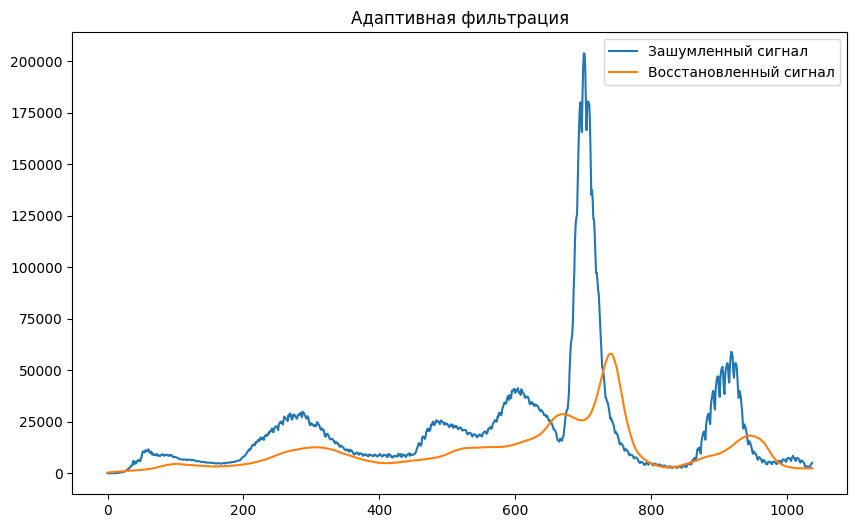

In [193]:
signal = np.array(data["Заражений за день"])
mu_opt = calc_optimum(signal, signal, 1000000000000000)
filtered_signal = lms_adaptive_filter(signal, order=window_size, mu=mu_opt )
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Зашумленный сигнал')
plt.plot(filtered_signal, label='Восстановленный сигнал')
plt.legend()
plt.title('Адаптивная фильтрация')
plt.show()